# Practice Case Study - Clustering

-----------------------------------------
## Context
-----------------------------------------

Study of socio-economic factors is foundational to understanding and shaping the future of societies and hence of extreme interest to various government and non-government institutions. While GDP is one of the most popular measure used on popular vernacular, it is not the only measure of the growth and the state of an economy. This case study aims to deep dive into one such dataset that contains various socio-economic attributes for countries around the world.

-----------------------------------------
## Objective
-----------------------------------------

To identify if there exist various cluster of countries that are more similar to each other in terms of certain socio-economic factors

------------------------
## Data Dictionary
-------------------------
The data has the following attributes:
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports - Exports in % age of the GDP per capita
- health - The total spend on health given as % of GDP
- imports - The value of imports given as % of GDP per capita
- income - The net income per person
- inflation - Inflation rate %
- life_expec - Average life expectancy in years
- total_fer - The fertility rate - Average children per woman in the country
- gdpp - GDP per capita

In the dataset, we will not do clustering on the gdp and would rather try to understand the variation of other factors with GDP across the groups that we formed.

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z score
from sklearn.preprocessing import StandardScaler

#importing clustering algorithm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#silhoute score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
##loading the data


In [3]:
data=pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Observations:**
 
 - There are 167 observations and 10 columns in the data.
 - All columns have 167 non-null values i.e. there are no missing values.
 - All the columns except the country name are numerical.
 - Everything looks great, lets move ahead to check duplicates.

In [5]:
data[data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


There are no duplicates in this data

## Eda

In [6]:
#summary statistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


**Observations:**

- The child mortality rate has a high range from 2.6 to 208 deaths per 1000 live births. The average child mortality rate is approx 38 deaths per 1000 live births.
- Similarly, the exports and imports have a high range of values. The maximum values for exports and imports is 200% and 174% of GDP respectively. This can happen if a country's  export or import industry exceeds their its domestic economy.
- The total spend on heath is very less as compared to exports and imports for majority of counties. The average spend on health is approx 6.8% of GDP.
- The average life expectancy is approx 70 years but the minimum value is just 32 years.
- Other variables like gdpp, inflation, and income also shows a high variability which can be expected as they can be very different for different countries.
- Overall, % expenditure on health, average life expectancy seem to have lesser standard deviation which reflects less variability across countries. All other variables seem to have very high spread across countries. These are the variables that might help us identify the clusters, if they exist. 

child_mort
skew: 1.45


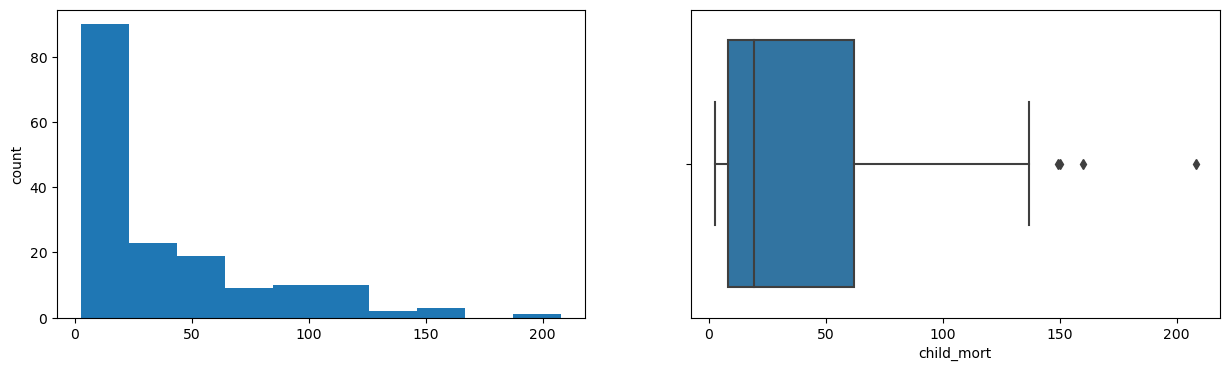

exports
skew: 2.45


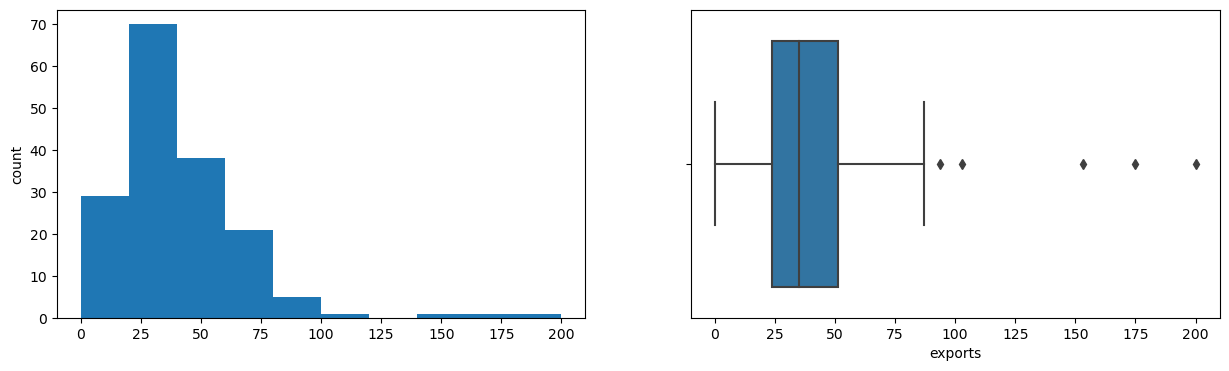

health
skew: 0.71


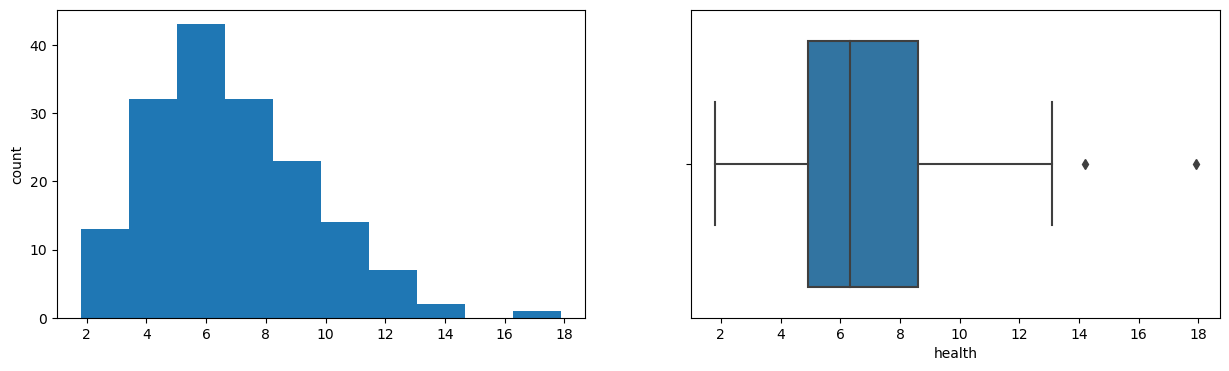

imports
skew: 1.91


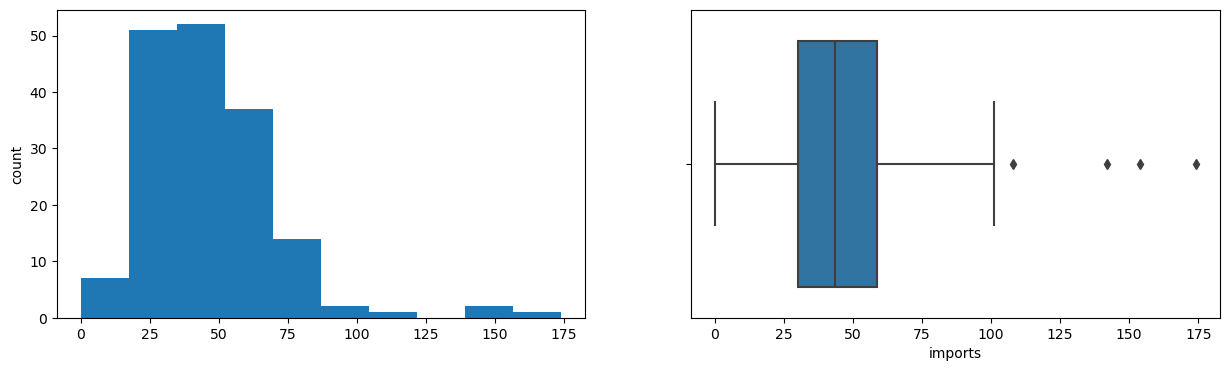

income
skew: 2.23


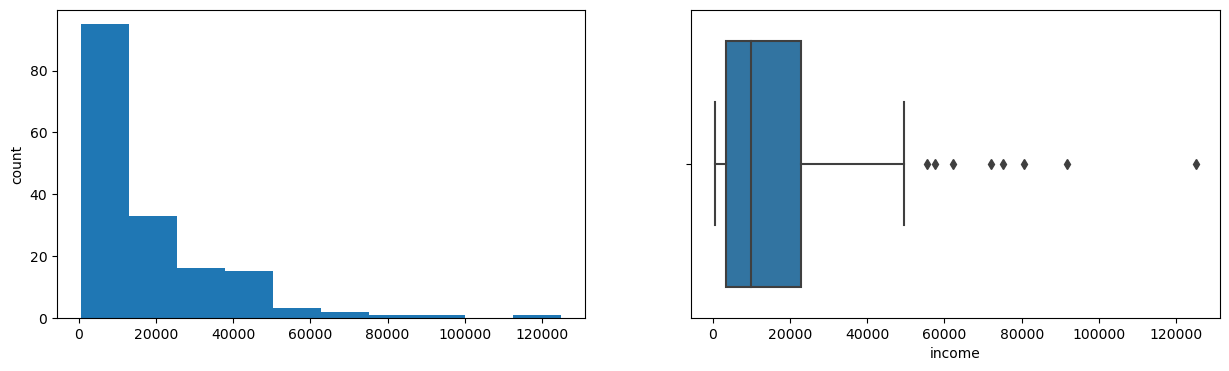

inflation
skew: 5.15


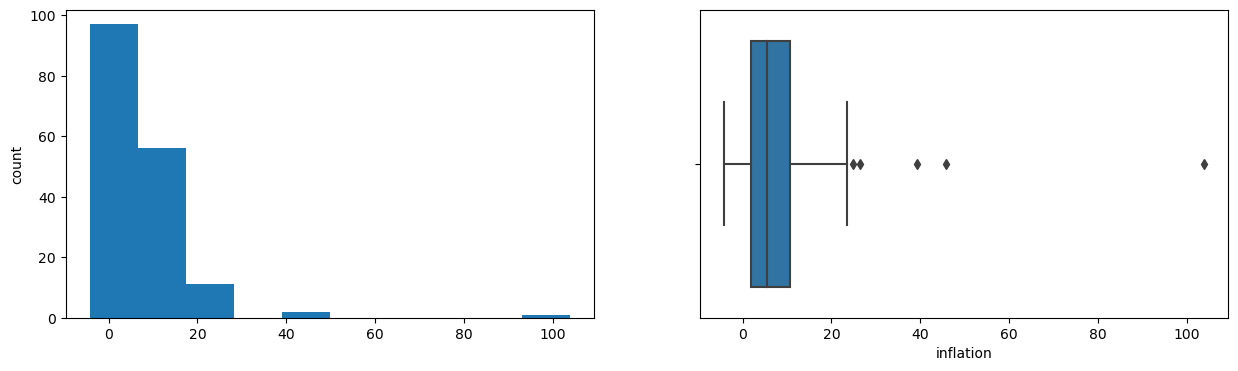

life_expec
skew: -0.97


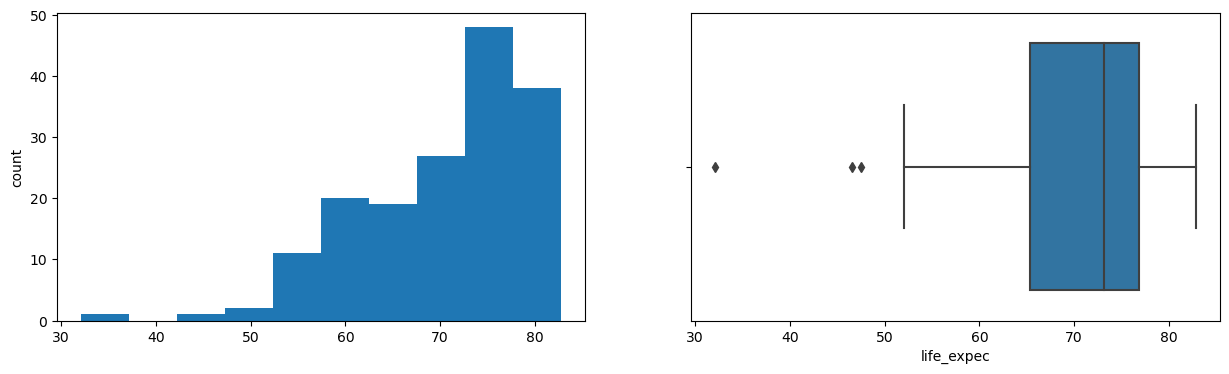

total_fer
skew: 0.97


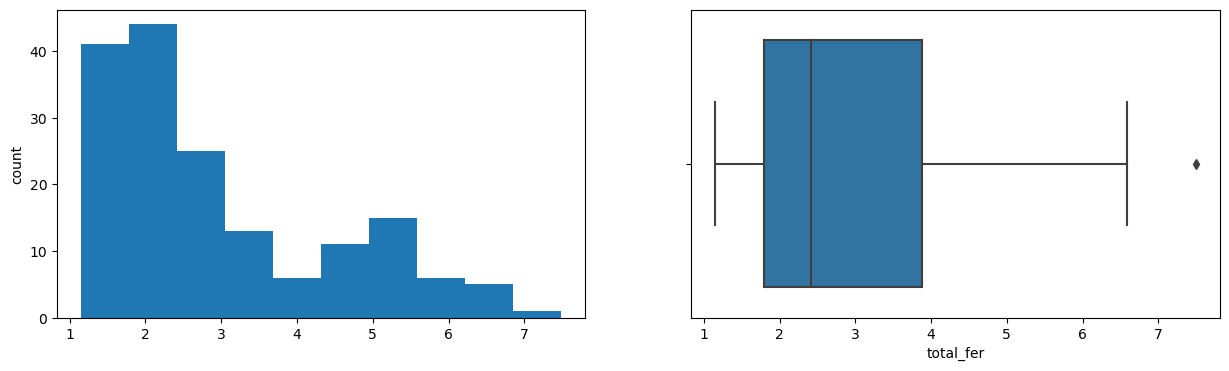

gdpp
skew: 2.22


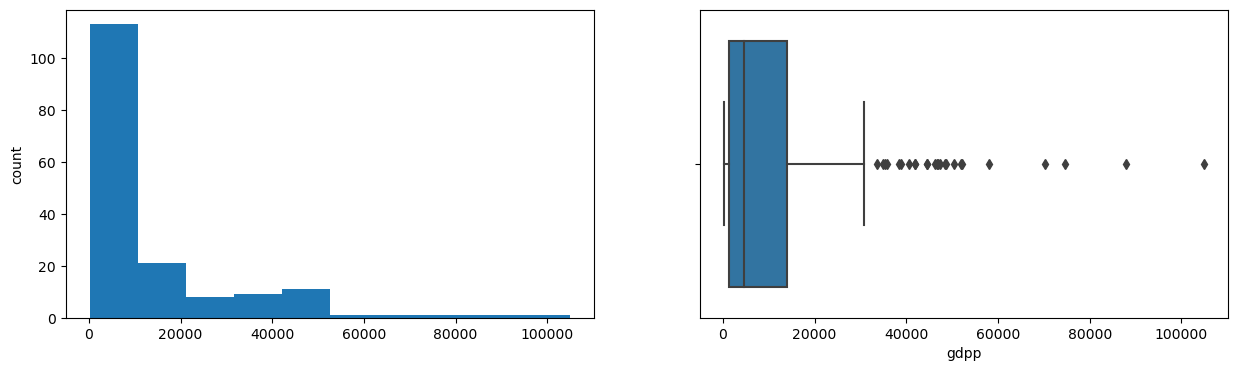

In [7]:
# lets check the distribution and outliers for each column in the data 

for col in data.columns[1:]:
    print(col)
    print('skew:',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10,grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- As observed earlier, most of the variables have skewed distributions
- The distribution for the % expenditure on health is relatively less skewed with fewer outliers
- The life expectancy is the only variable which is skewed to the left meaning most of the countries have already been successful in achieving high life expectancy
- The distribution for all other variables is highly skewed to the right. All these variables have some outliers to the right end.

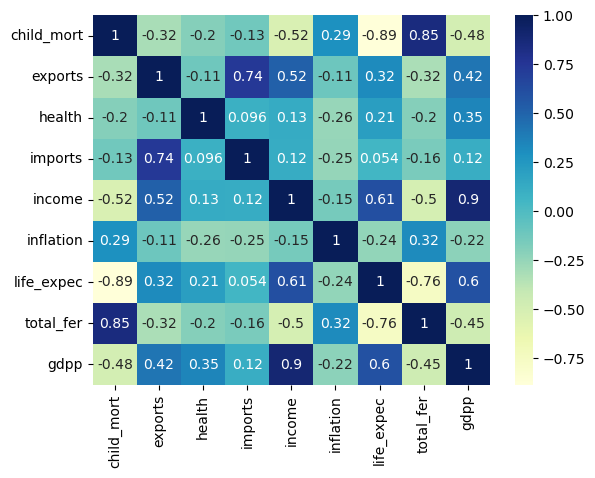

In [8]:
# lets check the correlation between data

sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

**Observations:**

- There is a strong positive correlation between gdpp and income. This makes sense. 
- The life expectancy is positively correlated with gdpp. This indicates that people live longer in richer countries. 
- There is a strong negative correlation between life expectancy and child mortality. This is understandable.
- The child mortality has a strong positive correlation with fertility rate. This indicates that increasing population leads to higher child mortality.

Scaling the data
- Clustering algorithms are distance based algorithms and all distance based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering algorithms.
- We will drop the variables `'country'` and `'gdpp'` before scaling the data as we would not use these two variables for clustering the countries.

In [9]:
data_new=data.drop(columns=["country","gdpp"])

In [10]:
scaler=StandardScaler()

data_scaled=pd.DataFrame(scaler.fit_transform(data_new),columns=data_new.columns)
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [11]:
#creating the copy of the data

data_scaled_copy=data_scaled.copy(deep=True)

# # k means clustering


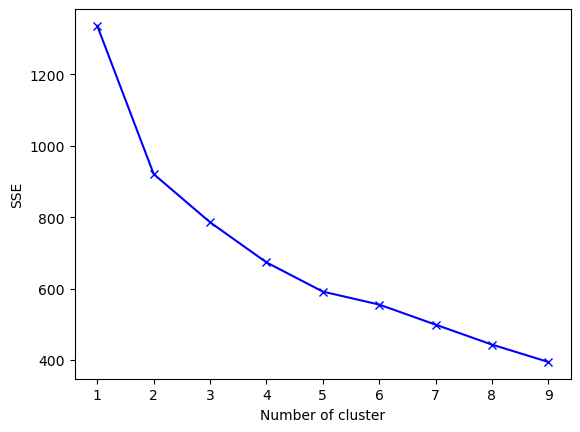

In [12]:
# empty the dictionary to store the sse for each value of k

sse={}

#itreate for a range of ks and fit the scaled data into the algorithm , use inertia attribute
#store the inertia values for that k

for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(data_scaled)
    sse[k]=kmeans.inertia_
    
#elbow plot
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

**Observations:**

- We can see from the plot that there is a consistent dip from 2 to 8 and there doesn't seem to be a clear 'elbow' here. We may chose any from 2 to 8 as our # of clusters. 
- So, let's look at another method to get a 'second opinion from maths'. Let's create a plot with Silhouette scores to see how it varies with k.

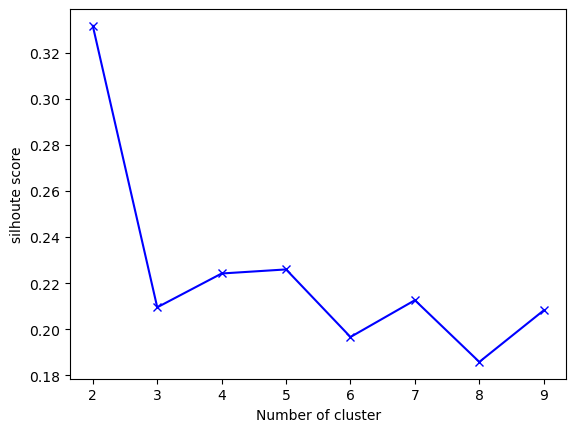

In [13]:
#empty dictionary to store silhoutte score
sc={}

for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(data_scaled)
    labels=kmeans.predict(data_scaled)
    sc[k]=silhouette_score(data_scaled,labels)
    
#elbow plot
plt.figure()
plt.plot(list(sc.keys()),list(sc.values()),'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("silhoute score")
plt.show()   

In [14]:
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(data_scaled)

#adding predicted labels to the orignal data and scaled data
data_scaled_copy['KMeans_Labels']=kmeans.predict(data_scaled)
data['KMeans_Labels']=kmeans.predict(data_scaled)

In [15]:
data['KMeans_Labels'].value_counts()

0    67
2    59
1    41
Name: KMeans_Labels, dtype: int64

In [16]:
#Calculating mean and median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,28.667164,98.231707,7.506780,24.10,92.10,6.00
exports,36.726701,27.258780,55.710169,32.70,22.80,49.40
health,5.665672,6.338049,8.453559,5.44,5.30,8.73
imports,42.459193,42.621951,54.888136,42.10,40.30,48.70
income,10820.000000,2913.487805,34216.440678,9350.00,1730.00,29600.00
inflation,9.550761,12.285244,2.643559,7.20,8.79,1.57
life_expec,70.901493,58.973171,78.211864,71.50,59.50,79.50
total_fer,2.585075,5.232195,1.772712,2.58,5.21,1.77
gdpp,5130.328358,1393.707317,29900.677966,4140.00,708.00,26900.00


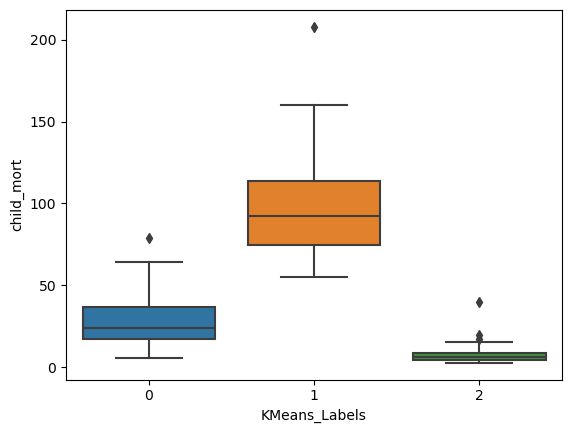

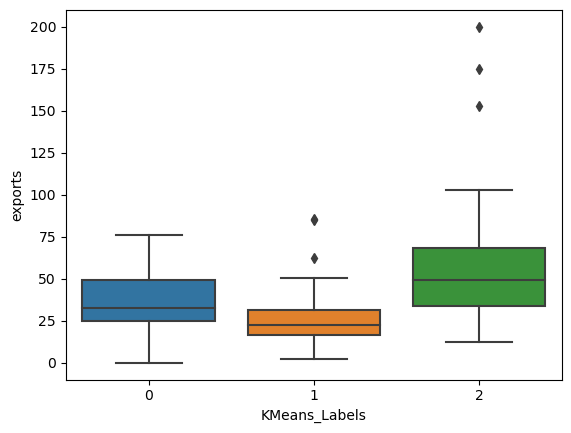

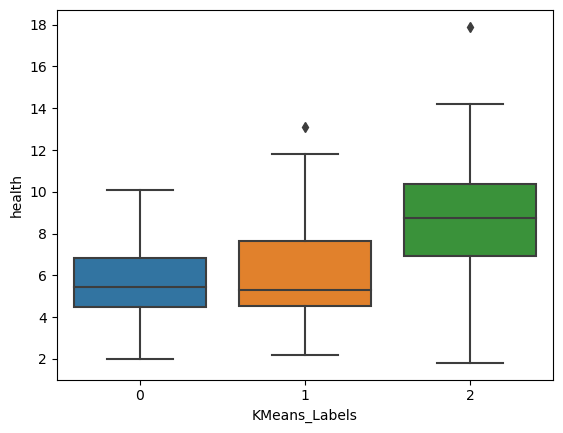

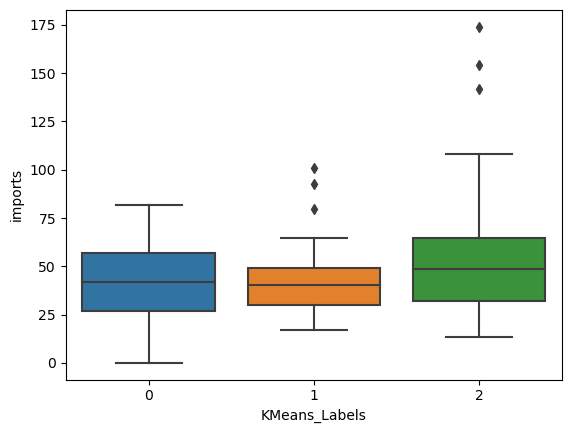

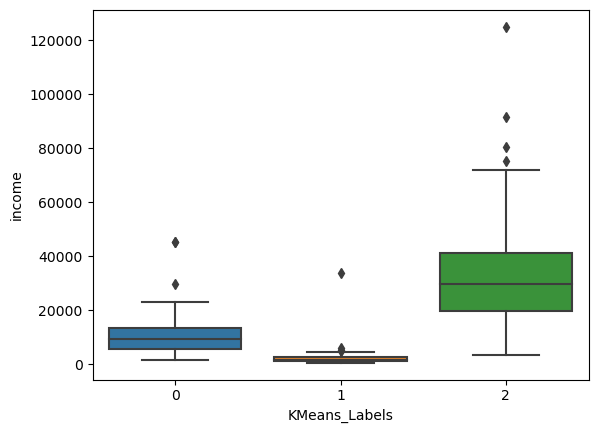

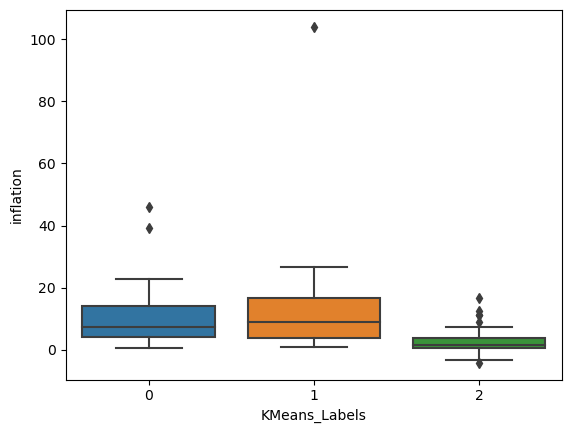

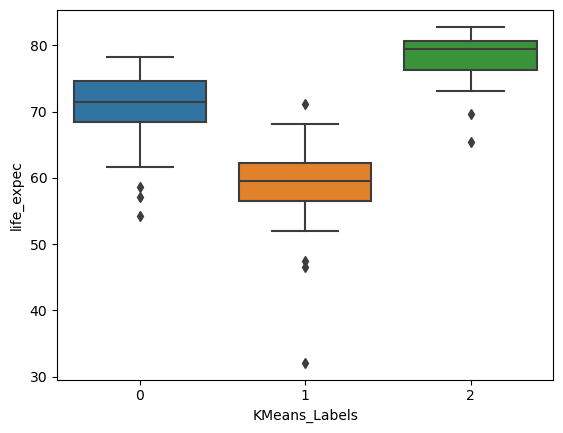

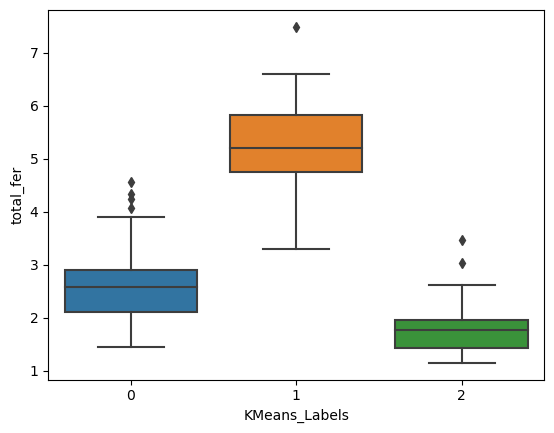

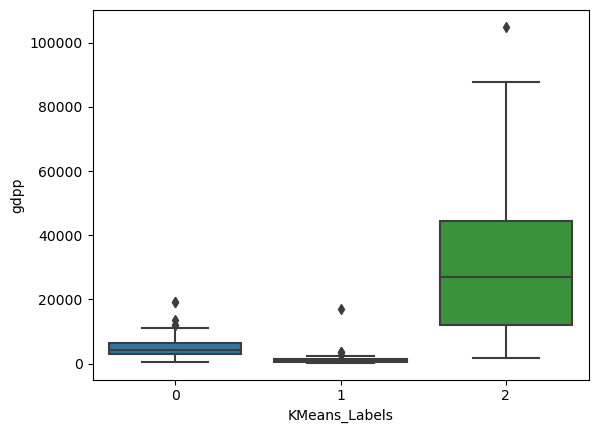

In [17]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

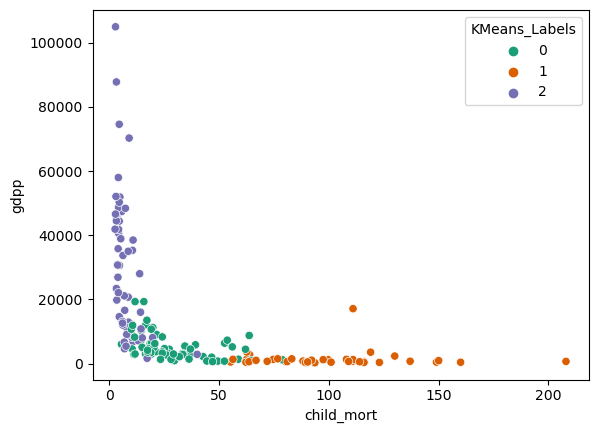

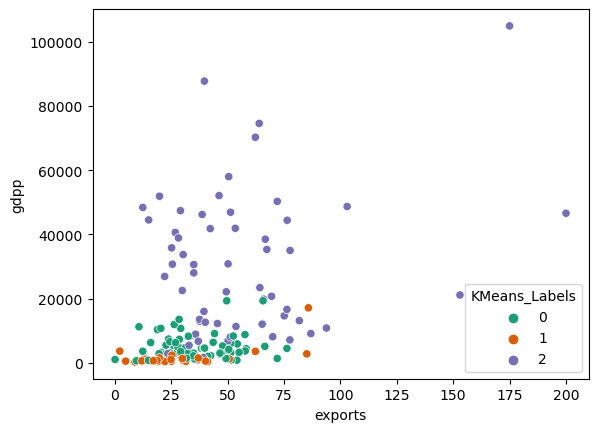

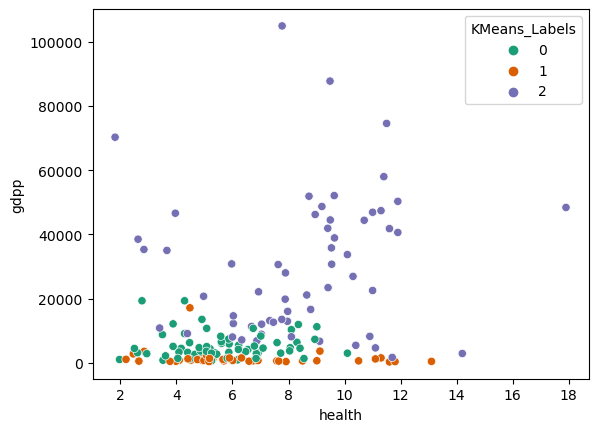

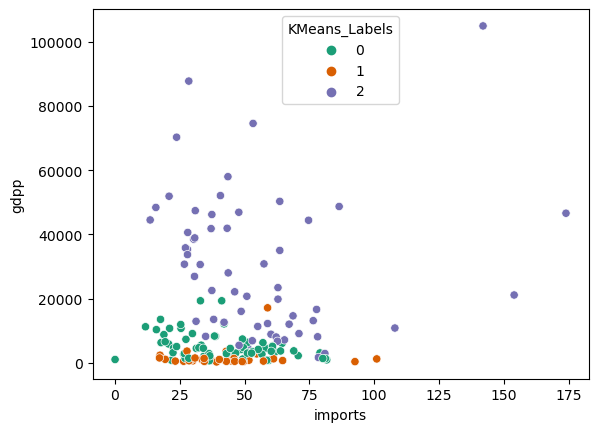

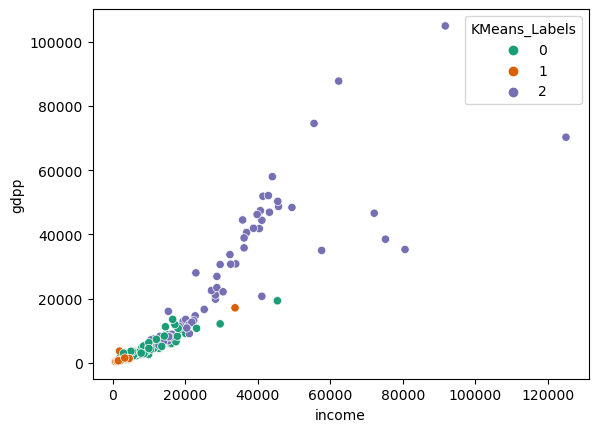

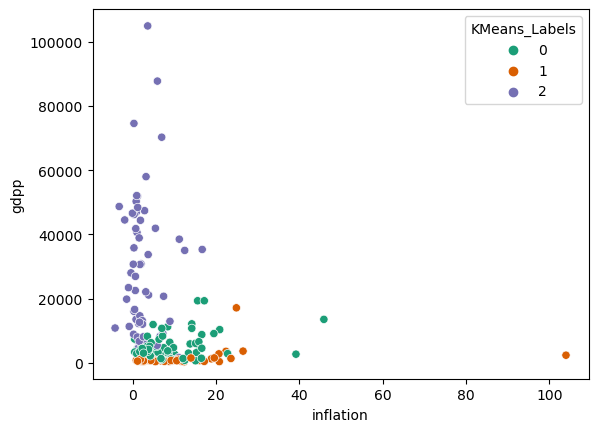

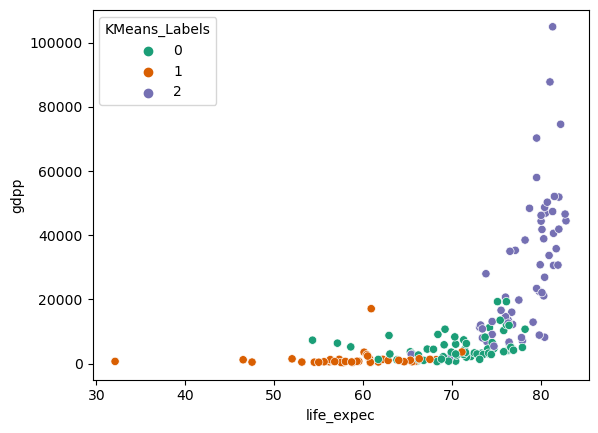

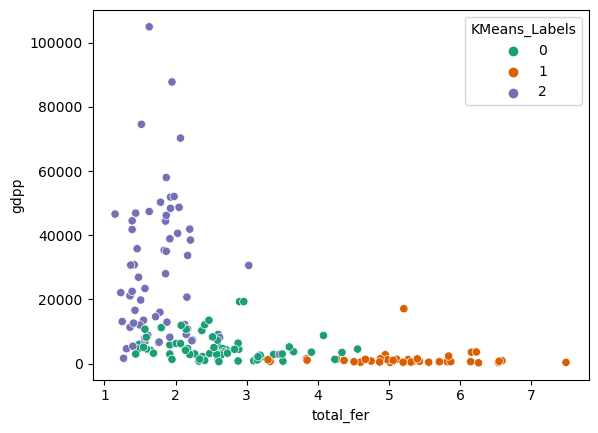

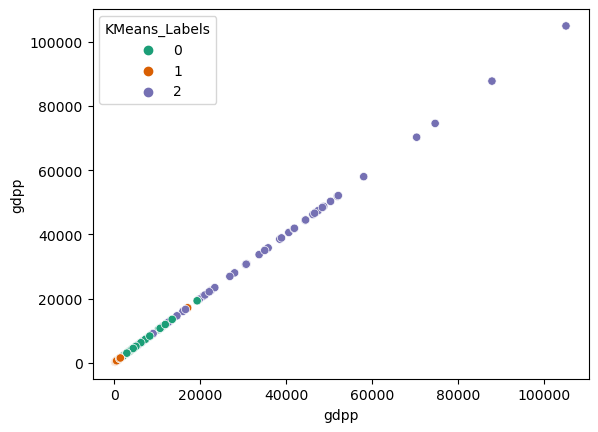

In [18]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'gdpp',data = data ,hue='KMeans_Labels', palette='Dark2')
    plt.show()

In [20]:
from sklearn_extra.cluster import KMedoids 

In [21]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [22]:
data.kmedoLabels.value_counts()

1    75
2    58
0    34
Name: kmedoLabels, dtype: int64

In [23]:
#Calculating mean and median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,7.085294,17.853333,82.951724,4.700,15.70,79.600
exports,36.938235,52.989333,28.191362,31.600,48.30,23.800
health,9.413235,6.202133,6.086379,9.585,6.00,5.275
imports,33.452941,57.694667,40.795964,30.750,55.10,36.800
income,38094.705882,17592.800000,4284.189655,36550.000,13500.00,2145.000
inflation,4.020676,5.511573,12.922328,1.825,3.82,9.225
life_expec,79.614706,73.870667,60.958621,80.200,74.10,60.800
total_fer,1.842353,2.179600,4.589655,1.875,2.13,4.875
gdpp,35925.588235,10989.813333,2057.034483,38700.000,6230.00,994.000


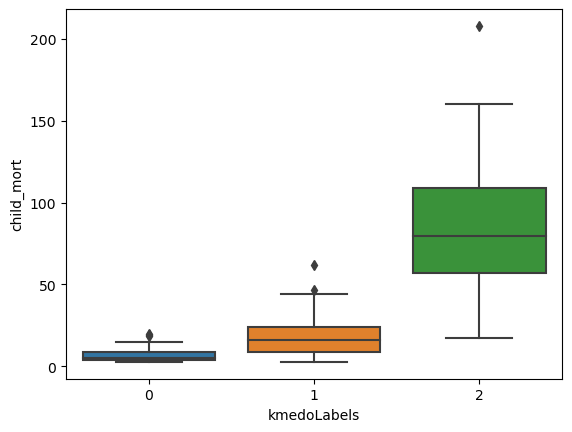

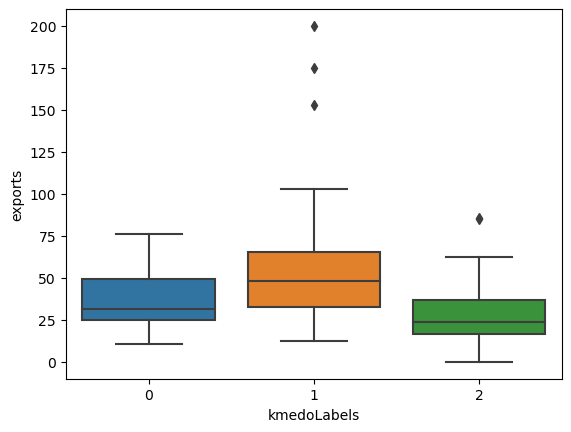

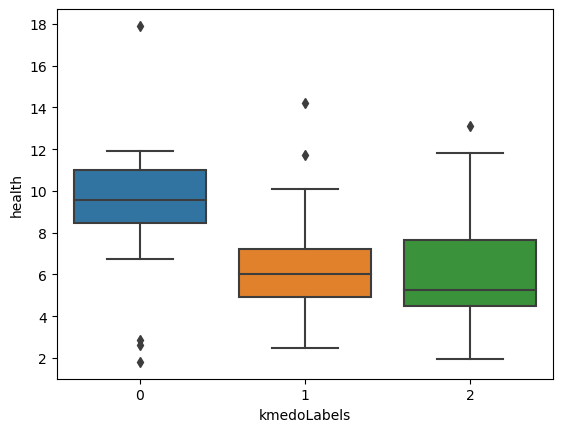

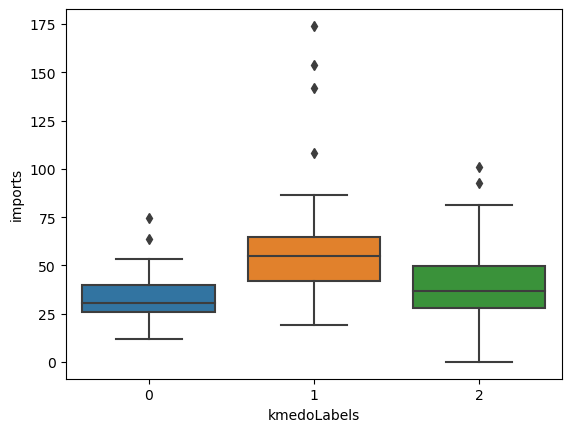

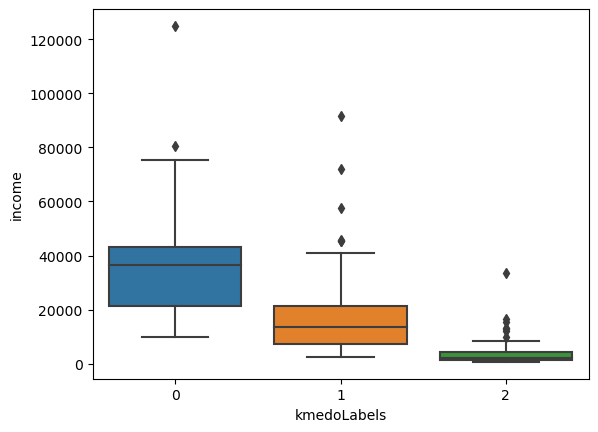

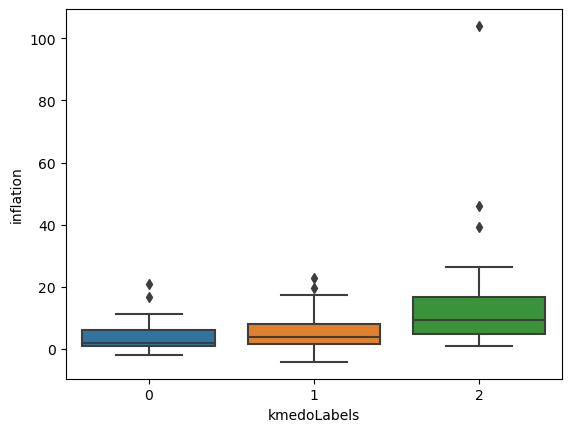

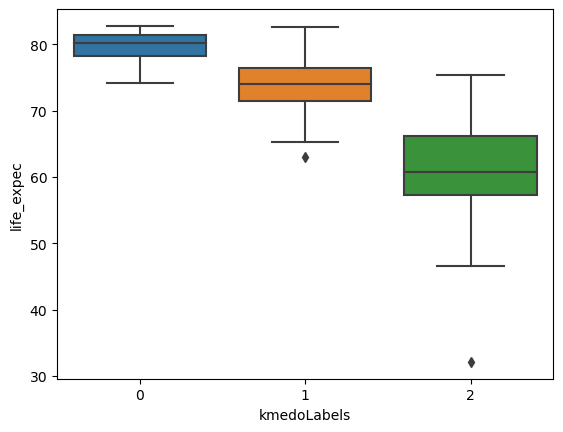

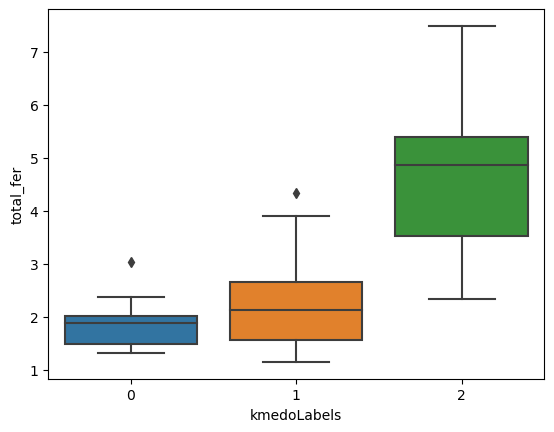

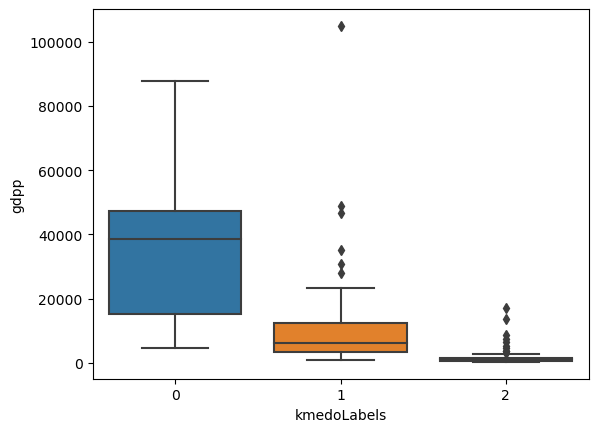

In [24]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data)
    plt.show()

In [25]:
gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [26]:
data.GmmLabels.value_counts()

0    62
2    55
1    50
Name: GmmLabels, dtype: int64

In [27]:
#Calculating mean and median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,26.975806,87.0720,6.636364,21.300,88.750,5.50
exports,37.541597,28.3524,56.727273,34.900,23.800,50.20
health,5.872903,6.6262,8.050727,5.645,5.790,8.35
imports,45.718805,43.2400,51.529091,48.250,41.500,42.10
income,9284.354839,4418.2600,37574.909091,8890.000,2145.000,33900.00
inflation,7.547419,12.9951,3.306745,6.875,9.060,1.66
life_expec,71.633871,60.4280,78.547273,71.850,60.300,79.50
total_fer,2.478226,4.7968,1.796727,2.395,5.035,1.84
gdpp,4547.403226,2254.5000,32188.181818,3885.000,1020.000,30600.00


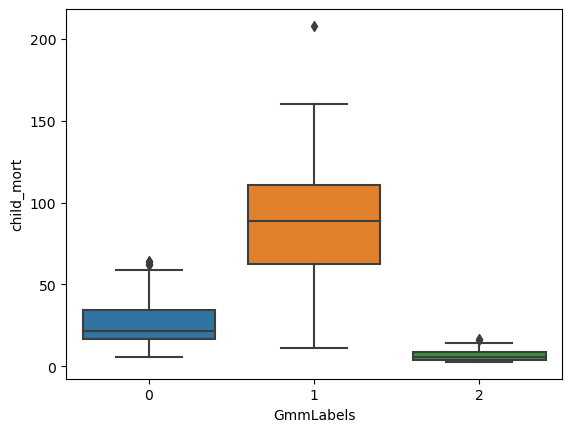

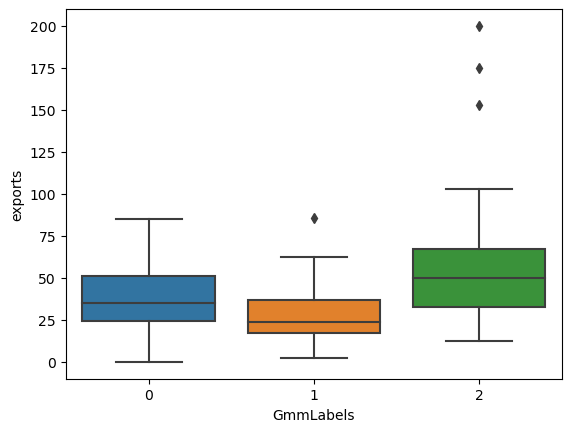

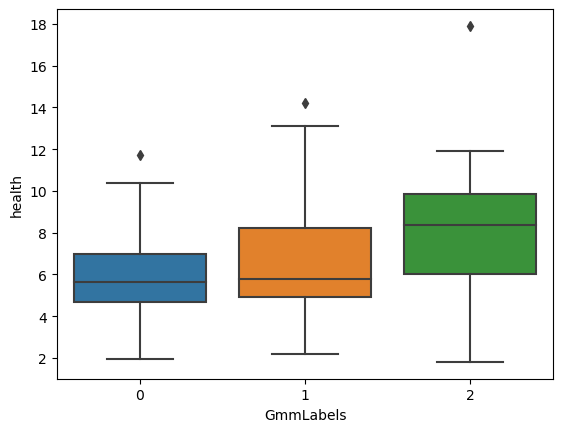

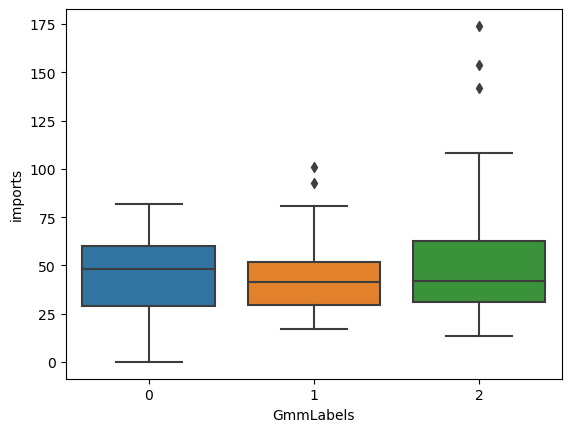

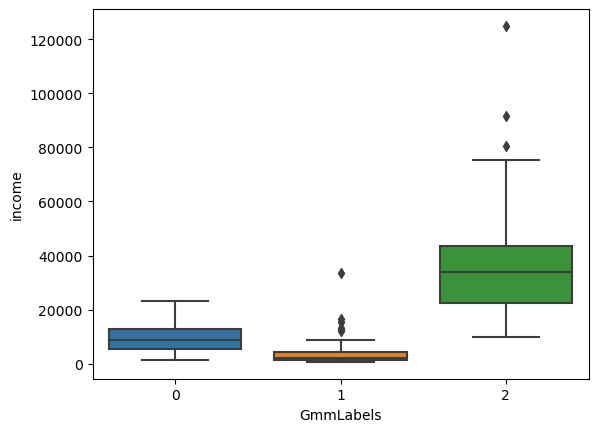

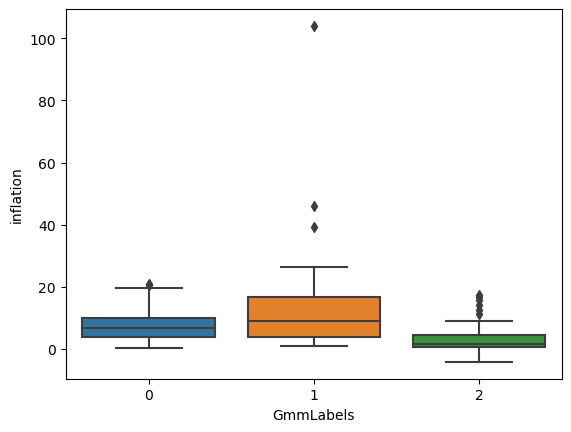

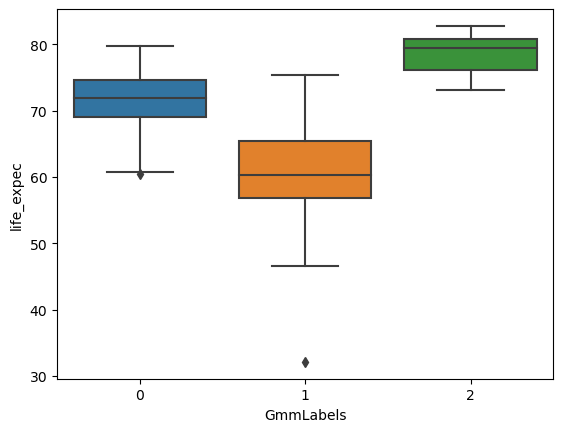

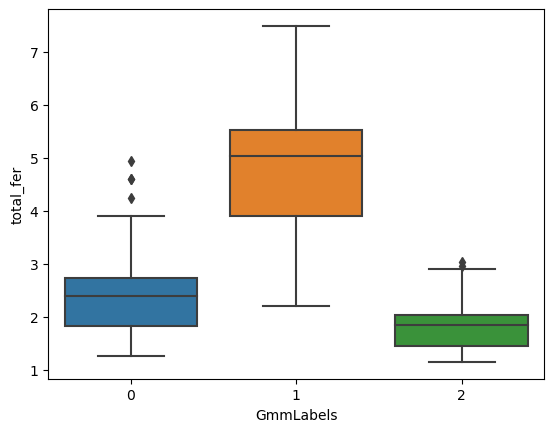

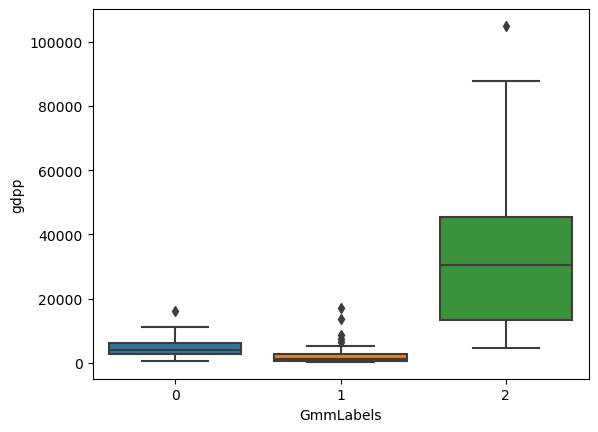

In [28]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)
    plt.show()